In [1]:
% setup MRI-education-resources path and requirements
cd ../
startup

loading image
loading signal


# RF Pulse Design

RF pulse design in the small-tip regime (< 60-degrees) can utilize the Fourier Transform, while larger flip angle designs such as 90 and 180-degree pulses benefit from advanced techniques like the Shinnar-Le Roux (SLR) algorithm.

## Learning Goals

1. Manipulate MRI sequence parameters to improve performance
    * Understand how to design RF pulses

## General Considerations

RF pulse designs should address the limited available pulse duration and, for large flip angle designs (e.g. 90 and 180 degrees) the non-linearities in the Bloch equation.  

Limited available durations are addressed, in small flip angle pulses, by using windowing functions along with sinc pulses.  The end result are windowed sinc pulses, which have less ringing in the coil profile as illustrated below.

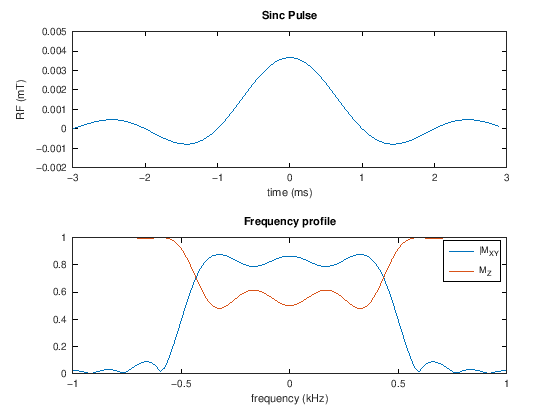

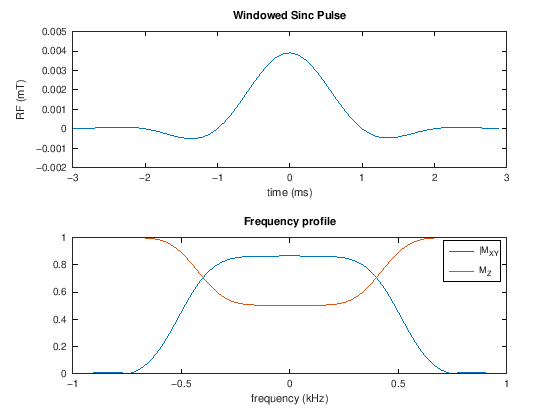

In [ ]:
% windowed versus non-windowed sinc function

gammabar = 42.58; % kHz/mT

M0 = 1;
M_equilibrium = [0,0,M0].';
dt = 0.1; % ms

flip = 60;

tmax = 6;
N = tmax/dt;
t = [-N/2:N/2-1]*dt;

BW = 1; % kHz
df = linspace(-BW,BW);

% Sinc pulse
RF =  sinc(t);
RF = (flip*pi/180)* RF/sum(RF) /(2*pi*gammabar*dt);

M = repmat(M_equilibrium, [1, length(df)]);
for n = 1:length(t)
    for f = 1:length(df)
        M(:,f) = bloch_rotate( M(:,f), dt, [real(RF(n)),imag(RF(n)),df(f)/gammabar]);
    end
end

figure
subplot(211)
plot(t,RF)
xlabel('time (ms)'), ylabel('RF (mT)')
title('Sinc Pulse')
subplot(212)
plot(df,sqrt(M(1,:).^2 + M(2,:).^2), df, M(3,:))
title('Frequency profile')
xlabel('frequency (kHz)'), legend('|M_{XY}|', 'M_Z')%, ylabel('flip')

% Windowed Sinc Pulse
RF =  hamming(N)' .* sinc(t);
RF = (flip*pi/180)* RF/sum(RF) /(2*pi*gammabar*dt);


M = repmat(M_equilibrium, [1, length(df)]);
for n = 1:length(t)
    for f = 1:length(df)
        M(:,f) = bloch_rotate( M(:,f), dt, [real(RF(n)),imag(RF(n)),df(f)/gammabar]);
    end
end


figure
subplot(211)
plot(t,RF)
xlabel('time (ms)'), ylabel('RF (mT)')
title('Windowed Sinc Pulse')
subplot(212)
plot(df,sqrt(M(1,:).^2 + M(2,:).^2), df, M(3,:))
title('Frequency profile')
xlabel('frequency (kHz)'), legend('|M_{XY}|', 'M_Z')%, ylabel('flip')

## Time-bandwidth Product and Pulse Selectivity

Arguably the most important RF pulse design parameter is the "time-bandwidth" product.  As the name implies, this is the pulse duration (time) times the pulse bandwidth

$$ TBW = T_{rf} \times BW_{rf} $$

A given RF pulse shape has an associated TBW, and this shape can be stretched or shrunk in time to modulate the resulting bandwidth.

The key feature of the TBW is that it controls the _pulse selectivity_, that is how sharp the pulse profile is, or, in other words, how quickly the profile goes from the desired flip angle to zero flip angle.

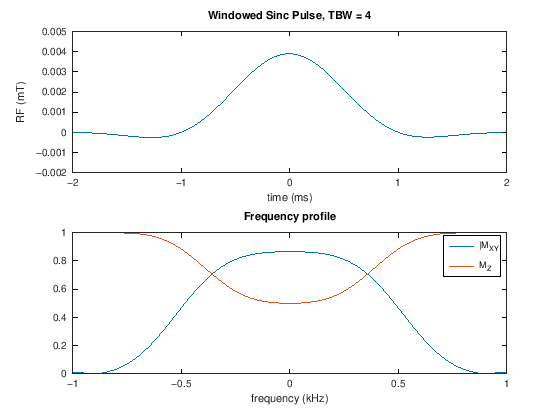

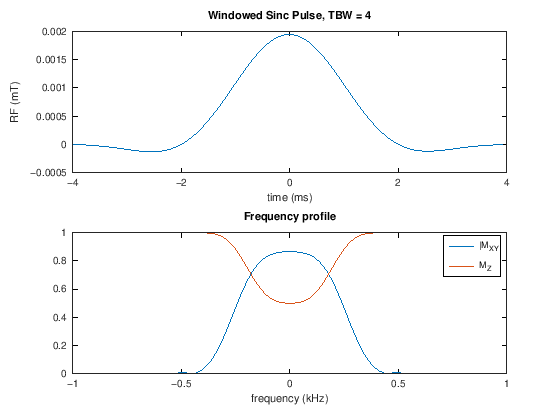

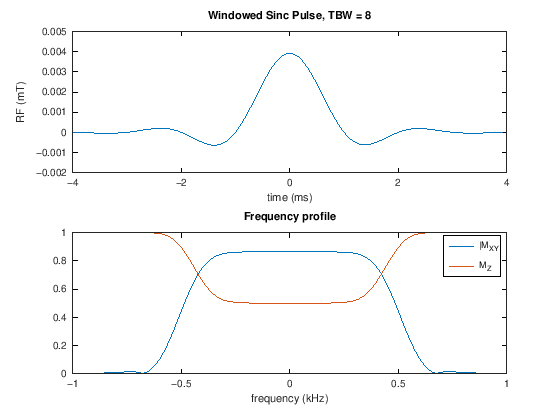

In [4]:
% Illustration of time-bandwidth product

gammabar = 42.58; % kHz/mT

M0 = 1;
M_equilibrium = [0,0,M0].';

flip = 60;
BWplot = 1; % kHz
df = linspace(-BWplot,BWplot);

% Create TBW = 4 pulse shape
TBW = 4;
N = 100;
IN = [-N/2:N/2-1]/N;
RF_shape =  hamming(N)' .*sinc(IN * TBW);

% Trf = 4 ms pulse, TBW = 4, so BWrf = TBW/Trf = 1 kHz
Trf = 4;
t = IN*Trf;
dt = Trf/N;

RF = (flip*pi/180)* RF_shape/sum(RF_shape) /(2*pi*gammabar*dt);

M = repmat(M_equilibrium, [1, length(df)]);
for n = 1:length(t)
    for f = 1:length(df)
        M(:,f) = bloch_rotate( M(:,f), dt, [real(RF(n)),imag(RF(n)),df(f)/gammabar]);
    end
end

figure
subplot(211)
plot(t,RF)
xlabel('time (ms)'), ylabel('RF (mT)')
title(['Windowed Sinc Pulse, TBW = ' int2str(TBW)])
subplot(212)
plot(df,sqrt(M(1,:).^2 + M(2,:).^2), df, M(3,:))
title('Frequency profile')
xlabel('frequency (kHz)'), legend('|M_{XY}|', 'M_Z')%, ylabel('flip')


% Trf = 8 ms pulse, TBW = 4, so BWrf = TBW/Trf = 0.5 kHz
Trf = 8;
t = IN*Trf;
dt = Trf/N;

RF = (flip*pi/180)* RF_shape/sum(RF_shape) /(2*pi*gammabar*dt);

M = repmat(M_equilibrium, [1, length(df)]);
for n = 1:length(t)
    for f = 1:length(df)
        M(:,f) = bloch_rotate( M(:,f), dt, [real(RF(n)),imag(RF(n)),df(f)/gammabar]);
    end
end

figure
subplot(211)
plot(t,RF)
xlabel('time (ms)'), ylabel('RF (mT)')
title(['Windowed Sinc Pulse, TBW = ' int2str(TBW)])
subplot(212)
plot(df,sqrt(M(1,:).^2 + M(2,:).^2), df, M(3,:))
title('Frequency profile')
xlabel('frequency (kHz)'), legend('|M_{XY}|', 'M_Z')%, ylabel('flip')


% Create TBW = 8 pulse shape
TBW = 8;
N = 100;
IN = [-N/2:N/2-1]/N;
RF_shape =  hamming(N)' .*sinc(IN * TBW);

% Trf = 8 ms pulse, TBW = 8, so BWrf = TBW/Trf = 1 kHz
Trf = 8;
t = IN*Trf;
dt = Trf/N;

RF = (flip*pi/180)* RF_shape/sum(RF_shape) /(2*pi*gammabar*dt);

M = repmat(M_equilibrium, [1, length(df)]);
for n = 1:length(t)
    for f = 1:length(df)
        M(:,f) = bloch_rotate( M(:,f), dt, [real(RF(n)),imag(RF(n)),df(f)/gammabar]);
    end
end

figure
subplot(211)
plot(t,RF)
xlabel('time (ms)'), ylabel('RF (mT)')
title(['Windowed Sinc Pulse, TBW = ' int2str(TBW)])
subplot(212)
plot(df,sqrt(M(1,:).^2 + M(2,:).^2), df, M(3,:))
title('Frequency profile')
xlabel('frequency (kHz)'), legend('|M_{XY}|', 'M_Z')%, ylabel('flip')


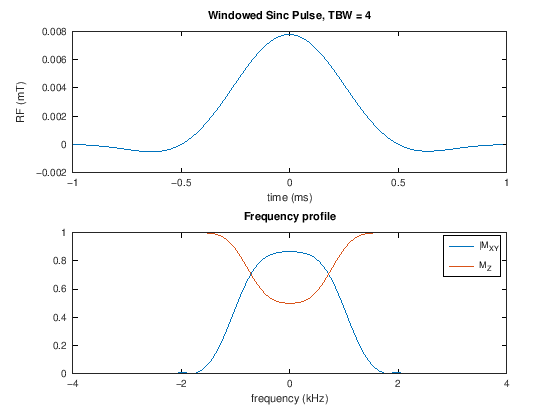

In [6]:
% Play around with the time-bandwidth product!!
TBW = 4;
Trf = 2;

gammabar = 42.58; % kHz/mT

M0 = 1;
M_equilibrium = [0,0,M0].';

flip = 60;
BWplot = 4; % kHz
df = linspace(-BWplot,BWplot);

N = 100;
IN = [-N/2:N/2-1]/N;
RF_shape =  hamming(N)' .*sinc(IN * TBW);

t = IN*Trf;
dt = Trf/N;

RF = (flip*pi/180)* RF_shape/sum(RF_shape) /(2*pi*gammabar*dt);

M = repmat(M_equilibrium, [1, length(df)]);
for n = 1:length(t)
    for f = 1:length(df)
        M(:,f) = bloch_rotate( M(:,f), dt, [real(RF(n)),imag(RF(n)),df(f)/gammabar]);
    end
end

figure
subplot(211)
plot(t,RF)
xlabel('time (ms)'), ylabel('RF (mT)')
title(['Windowed Sinc Pulse, TBW = ' int2str(TBW)])
subplot(212)
plot(df,sqrt(M(1,:).^2 + M(2,:).^2), df, M(3,:))
title('Frequency profile')
xlabel('frequency (kHz)'), legend('|M_{XY}|', 'M_Z')%, ylabel('flip')

Notice that the higher TBW pulse has much sharper frequency profile for the same pulse duration!  (But also higher peak power.)

## High flip angle pulse design


For small flip angles, the frequency profile of a RF pulse is approximately given by the Fourier Transform.  However, non-linearities in the Bloch equation cause this approximation to break down for large flip angles, as shown below by the resulting "ripples" in the frequency profile when the flip angle of the windowed.


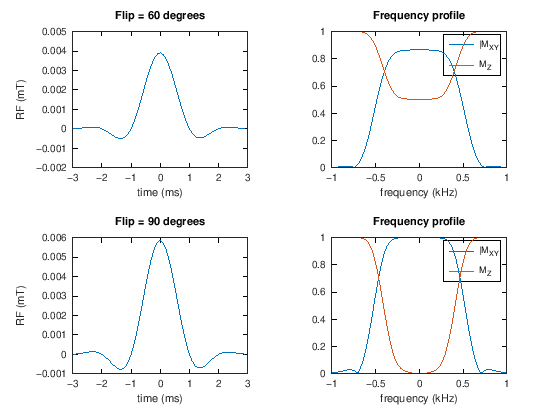

In [10]:
% small tip vs large tip
gammabar = 42.58; % kHz/mT

M0 = 1;
M_equilibrium = [0,0,M0].';
dt = 0.1; % ms

tmax = 6;
N = tmax/dt;
t = [-N/2:N/2-1]*dt;

BW = 1; % kHz
df = linspace(-BW,BW);

% Windowed Sinc Pulse
RF =  hamming(N)' .* sinc(t);

flip = 60;
RF = (flip*pi/180)* RF/sum(RF) /(2*pi*gammabar*dt);

M = repmat(M_equilibrium, [1, length(df)]);
for n = 1:length(t)
    for f = 1:length(df)
        M(:,f) = bloch_rotate( M(:,f), dt, [real(RF(n)),imag(RF(n)),df(f)/gammabar]);
    end
end


subplot(221)
plot(t,RF)
xlabel('time (ms)'), ylabel('RF (mT)')
title(['Flip = ' int2str(flip) ' degrees'])
subplot(222)
plot(df,sqrt(M(1,:).^2 + M(2,:).^2), df, M(3,:))
title('Frequency profile')
xlabel('frequency (kHz)'),legend('|M_{XY}|', 'M_Z')%, ylabel('flip')


flip = 90;
RF = (flip*pi/180)* RF/sum(RF) /(2*pi*gammabar*dt);

M = repmat(M_equilibrium, [1, length(df)]);
for n = 1:length(t)
    for f = 1:length(df)
        M(:,f) = bloch_rotate( M(:,f), dt, [real(RF(n)),imag(RF(n)),df(f)/gammabar]);
    end
end

subplot(223)
plot(t,RF)
xlabel('time (ms)'), ylabel('RF (mT)')
title(['Flip = ' int2str(flip) ' degrees'])
subplot(224)
plot(df,sqrt(M(1,:).^2 + M(2,:).^2), df, M(3,:))
title('Frequency profile')
xlabel('frequency (kHz)'),legend('|M_{XY}|', 'M_Z')%, ylabel('flip')



Note that with Fourier Transform based design small ripples that appear outside the desired slice.

The solution is to use a more sophisticated pulse design that takes into account these non-linearities, such as the Shinnar-Le Roux (SLR) transform.

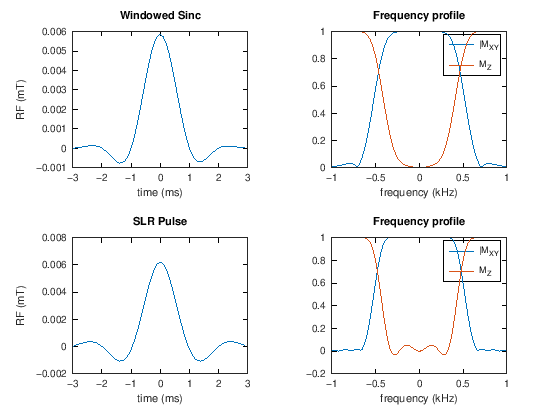

In [9]:
% Large tip pulse designs
gammabar = 42.58; % kHz/mT

M0 = 1;
M_equilibrium = [0,0,M0].';
dt = 0.1; % ms

tmax = 6;
N = tmax/dt;
t = [-N/2:N/2-1]*dt;

BW = 1; % kHz
df = linspace(-BW,BW);

% Windowed Sinc Pulse
RF =  hamming(N)' .* sinc(t);

flip = 90;
RF = (flip*pi/180)* RF/sum(RF) /(2*pi*gammabar*dt);

M = repmat(M_equilibrium, [1, length(df)]);
for n = 1:length(t)
    for f = 1:length(df)
        M(:,f) = bloch_rotate( M(:,f), dt, [real(RF(n)),imag(RF(n)),df(f)/gammabar]);
    end
end


subplot(221)
plot(t,RF)
xlabel('time (ms)'), ylabel('RF (mT)')
title(['Windowed Sinc'])
subplot(222)
plot(df,sqrt(M(1,:).^2 + M(2,:).^2), df, M(3,:))
title('Frequency profile')
xlabel('frequency (kHz)'),legend('|M_{XY}|', 'M_Z')%, ylabel('flip')

% Shinnar-Le Roux (SLR) Pulse design
RF = dzrf(N-1, tmax*1, 'ex');
RF = (flip*pi/180)* [0,RF]/sum(RF) /(2*pi*gammabar*dt);

M = repmat(M_equilibrium, [1, length(df)]);
for n = 1:length(t)
    for f = 1:length(df)
        M(:,f) = bloch_rotate( M(:,f), dt, [real(RF(n)),imag(RF(n)),df(f)/gammabar]);
    end
end

subplot(223)
plot(t,RF)
xlabel('time (ms)'), ylabel('RF (mT)')
title(['SLR Pulse'])
subplot(224)
plot(df,sqrt(M(1,:).^2 + M(2,:).^2), df, M(3,:))
title('Frequency profile')
xlabel('frequency (kHz)'),legend('|M_{XY}|', 'M_Z')%, ylabel('flip')


Note that now the ripples in the $M_{XY}$ profile are now removed!  (There is some increased ripple in $M_Z$, but this isn't an issue for excitation pulses).  The RF pulses themselves are only subtly different.

The degradation of the slice (frequency) profile of sinc-pulses becomes substantial with a 180-degree flip angle inversion pulse:

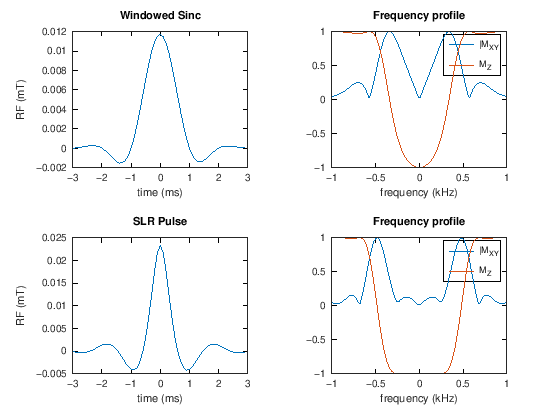

In [11]:
% Inversion (large-tip) pulses
gammabar = 42.58; % kHz/mT

M0 = 1;
M_equilibrium = [0,0,M0].';
dt = 0.1; % ms

tmax = 6;
N = tmax/dt;
t = [-N/2:N/2-1]*dt;

BW = 1; % kHz
df = linspace(-BW,BW);

% Windowed Sinc Pulse
RF =  hamming(N)' .* sinc(t);

flip = 180;
RF = (flip*pi/180)* RF/sum(RF) /(2*pi*gammabar*dt);

M = repmat(M_equilibrium, [1, length(df)]);
for n = 1:length(t)
    for f = 1:length(df)
        M(:,f) = bloch_rotate( M(:,f), dt, [real(RF(n)),imag(RF(n)),df(f)/gammabar]);
    end
end


subplot(221)
plot(t,RF)
xlabel('time (ms)'), ylabel('RF (mT)')
title(['Windowed Sinc'])
subplot(222)
plot(df,sqrt(M(1,:).^2 + M(2,:).^2), df, M(3,:))
title('Frequency profile')
xlabel('frequency (kHz)'),legend('|M_{XY}|', 'M_Z')%, ylabel('flip')

% Shinnar-Le Roux (SLR) Pulse design
RF = dzrf(N-1, tmax*1, 'inv');
RF = (flip*pi/180)* [0,RF]/sum(RF) /(2*pi*gammabar*dt);

M = repmat(M_equilibrium, [1, length(df)]);
for n = 1:length(t)
    for f = 1:length(df)
        M(:,f) = bloch_rotate( M(:,f), dt, [real(RF(n)),imag(RF(n)),df(f)/gammabar]);
    end
end

subplot(223)
plot(t,RF)
xlabel('time (ms)'), ylabel('RF (mT)')
title(['SLR Pulse'])
subplot(224)
plot(df,sqrt(M(1,:).^2 + M(2,:).^2), df, M(3,:))
title('Frequency profile')
xlabel('frequency (kHz)'),legend('|M_{XY}|', 'M_Z')%, ylabel('flip')


Note that the inversion profile $M_Z$ is much more selective, in other words more like a rectangular function, with the SLR pulse design.    The SLR RF pulse is now noticeably different from a windowed sinc.